## Aussi voir : machine de Boltzmann restreinte
https://www.jedha.co/formation-ia/algorithmes-deep-learning

In [1]:
import pandas as pd
import numpy as np

# Keras
from keras.models import Sequential
from keras.layers import Dense
from keras import callbacks

# sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import SimpleRNN


# Graph
import plotly.express as px
import matplotlib.pyplot as plt

In [2]:
path = r"C:\Users\sonia\Documents\Document\2022-2023\Projet 3I - Deep Learning\dataset_clean.csv"
TARGET = 'L7Protocol'

In [3]:
df = pd.read_csv(path)

list_protocol = ["AMAZON", "MICROSOFT", "YOUTUBE", "GMAIL", "WINDOWS_UPDATE", "SKYPE", "FACEBOOK", "DROPBOX"]
df = df[df['ProtocolName'].isin(list_protocol)]
df = df.drop(
    ['Source.Port',
     'Destination.Port',
     'Protocol',
     'Flow.ID',
     'Source.IP',
     'Destination.IP',
     'ProtocolName',
     'Timestamp'],   
    axis=1,
)

In [4]:
y = df[TARGET]
X = df.drop([TARGET],axis=1)
y = y.to_numpy()

In [5]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [6]:
X = scaler.transform(X)
y = to_categorical(y)

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 4)

In [8]:
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [9]:
print(X_train.shape)
print(X_test.shape)

(377483, 1, 67)
(94371, 1, 67)


In [10]:
model = Sequential()
model.add(SimpleRNN(units=32, input_shape=(1,67), activation="relu"))
model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                3200      
                                                                 
 dense (Dense)               (None, 8)                 264       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 3,473
Trainable params: 3,473
Non-trainable params: 0
_________________________________________________________________


In [11]:
#model = create_RNN(hidden_units=3, dense_units=1, input_shape=(time_steps,1), 
                   #activation=['tanh', 'tanh'])
history = model.fit(X_train, y_train, epochs=5, batch_size=1, verbose=2, validation_data= (X_test, y_test))

Epoch 1/5
377483/377483 - 733s - loss: 0.0089 - accuracy: 0.9977 - val_loss: 0.0047 - val_accuracy: 0.9948 - 733s/epoch - 2ms/step
Epoch 2/5
377483/377483 - 704s - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.0047 - val_accuracy: 0.9948 - 704s/epoch - 2ms/step
Epoch 3/5
377483/377483 - 710s - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.0047 - val_accuracy: 0.9948 - 710s/epoch - 2ms/step
Epoch 4/5
377483/377483 - 722s - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.0047 - val_accuracy: 0.9948 - 722s/epoch - 2ms/step
Epoch 5/5
377483/377483 - 6211s - loss: 0.0047 - accuracy: 0.9979 - val_loss: 0.0047 - val_accuracy: 0.9948 - 6211s/epoch - 16ms/step


In [12]:
accuracy = model.evaluate(X_test, y_test)
accuracy

2950/2950 [==============================] - 8s 3ms/step - loss: 0.0047 - accuracy: 0.9953


[0.004672935698181391, 0.9953402876853943]

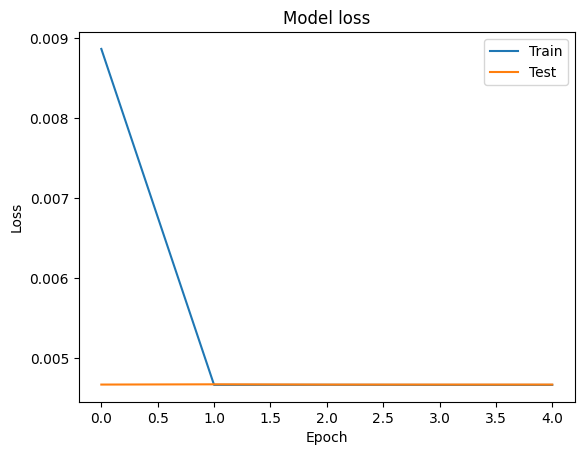

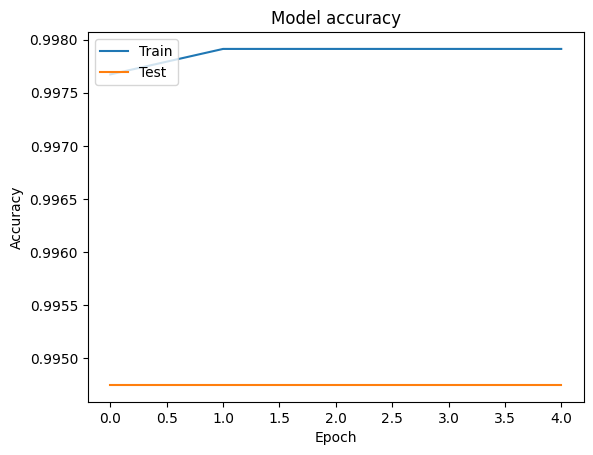

In [13]:
# loss plot function
def plot_loss(loss,val_loss):
    plt.figure()
    plt.plot(loss)
    plt.plot(val_loss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper right')  
    plt.show()
    
# accuracy plot function    
def plot_accuracy(acc,val_acc):
    plt.figure()
    plt.plot(acc)
    plt.plot(val_acc)
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

# plot loss and accuracy curves
plot_loss(history.history['loss'], history.history['val_loss'])
plot_accuracy(history.history['accuracy'], history.history['val_accuracy'])


In [ ]:
def create_RNN(hidden_units, dense_units, input_shape, activation):
    model = Sequential()
    model.add(SimpleRNN(hidden_units, input_shape=input_shape, 
                        activation=activation[0]))
    model.add(Dense(units=dense_units, activation=activation[1]))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.summary()
    return model
 
model = create_RNN(32, y.shape[1], [1], activation=['linear', 'linear'])